## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [44]:
print(x_train.shape[0])

60000


In [45]:
print(x_test.shape[0])

10000


### Find dimensions of an image in the dataset

In [46]:
print(x_train.shape[1:])
print(x_test[0].shape)

(28, 28)
(28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import numpy as np
import pandas as pd
import keras

In [48]:
pd.value_counts(y_test)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [49]:
pd.value_counts(y_train)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [51]:
x_train.dtype

dtype('uint8')

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [53]:
x_train.dtype

dtype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [56]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Reshape,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [58]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model.fit(x_train, y_train, nb_epoch=10, batch_size=32,
validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.3661 - acc: 0.8673 - val_loss: 0.3049 - val_acc: 0.8854
Epoch 2/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2290 - acc: 0.9153 - val_loss: 0.2461 - val_acc: 0.9075
Epoch 3/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.1646 - acc: 0.9383 - val_loss: 0.2504 - val_acc: 0.9115
Epoch 4/10
60000/60000 [==============================] - 203s 3ms/step - loss: 0.1147 - acc: 0.9571 - val_loss: 0.2819 - val_acc: 0.9124
Epoch 5/10
60000/60000 [==============================] - 204s 3ms/step - loss: 0.0773 - acc: 0.9714 - val_loss: 0.3181 - val_acc: 0.9120
Epoch 6/10
32576/60000 [===============>..............] - ETA: 1:30 - loss: 0.0457 - acc: 0.9837

KeyboardInterrupt: ignored

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [61]:
model2 = Sequential()

model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

model2.add(Convolution2D(32,3,3))
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model2.fit(x_train, y_train, nb_epoch=10, batch_size=32,
validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.3932 - acc: 0.8589 - val_loss: 0.2933 - val_acc: 0.8949
Epoch 2/10
 6880/60000 [==>...........................] - ETA: 2:04 - loss: 0.2675 - acc: 0.9001

KeyboardInterrupt: ignored

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

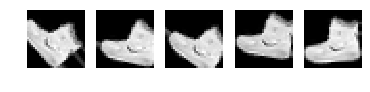

In [63]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [64]:
model4 = Sequential()

model4.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model4.add(Activation('relu'))

model4.add(Convolution2D(32, 3, 3))
model4.add(Activation('relu'))

model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(128))
model4.add(Activation('relu'))

model4.add(Dropout(0.5))

model4.add(Dense(10))
model4.add(Activation('softmax'))

early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `fit_generator` call to the Keras 2 

Epoch 1/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.9553 - acc: 0.6469 - val_loss: 0.6135 - val_acc: 0.7704
Epoch 2/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.7234 - acc: 0.7278 - val_loss: 0.5368 - val_acc: 0.8015
Epoch 3/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.6652 - acc: 0.7506 - val_loss: 0.5440 - val_acc: 0.8088
Epoch 4/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.6271 - acc: 0.7642 - val_loss: 0.4788 - val_acc: 0.8284
Epoch 5/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.5998 - acc: 0.7750 - val_loss: 0.4744 - val_acc: 0.8296
Epoch 6/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.5809 - acc: 0.7857 - val_loss: 0.4473 - val_acc: 0.8427
Epoch 7/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.5645 - acc: 0.7894 - val_loss: 0.4354 - val_acc: 0.8421
Epoch 8/10
1875/1875 [===================

###  Report the final train and validation accuracy

In [65]:
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 622us/step


[0.41334342503547666, 0.8514]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

### **Load CIFAR10 dataset**

In [0]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


In [78]:
x_train = x_train.reshape(x_train.shape[0], 32,32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

(50000, 32, 32, 3)
50000
10000


### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

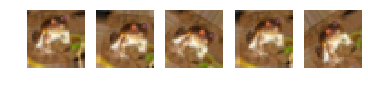

In [80]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()